# Problem Statement

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

pd.set_option("display.max_columns",None)

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("submission.csv")

In [3]:
train.shape, test.shape

((35000, 20), (15000, 19))

In [4]:
# Combining the data 

combined=pd.concat([train,test],ignore_index=True)

In [5]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

In [6]:
num_cols=combined.select_dtypes(np.number)
cat_col=combined.select_dtypes("object")

In [7]:
num_cols.columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

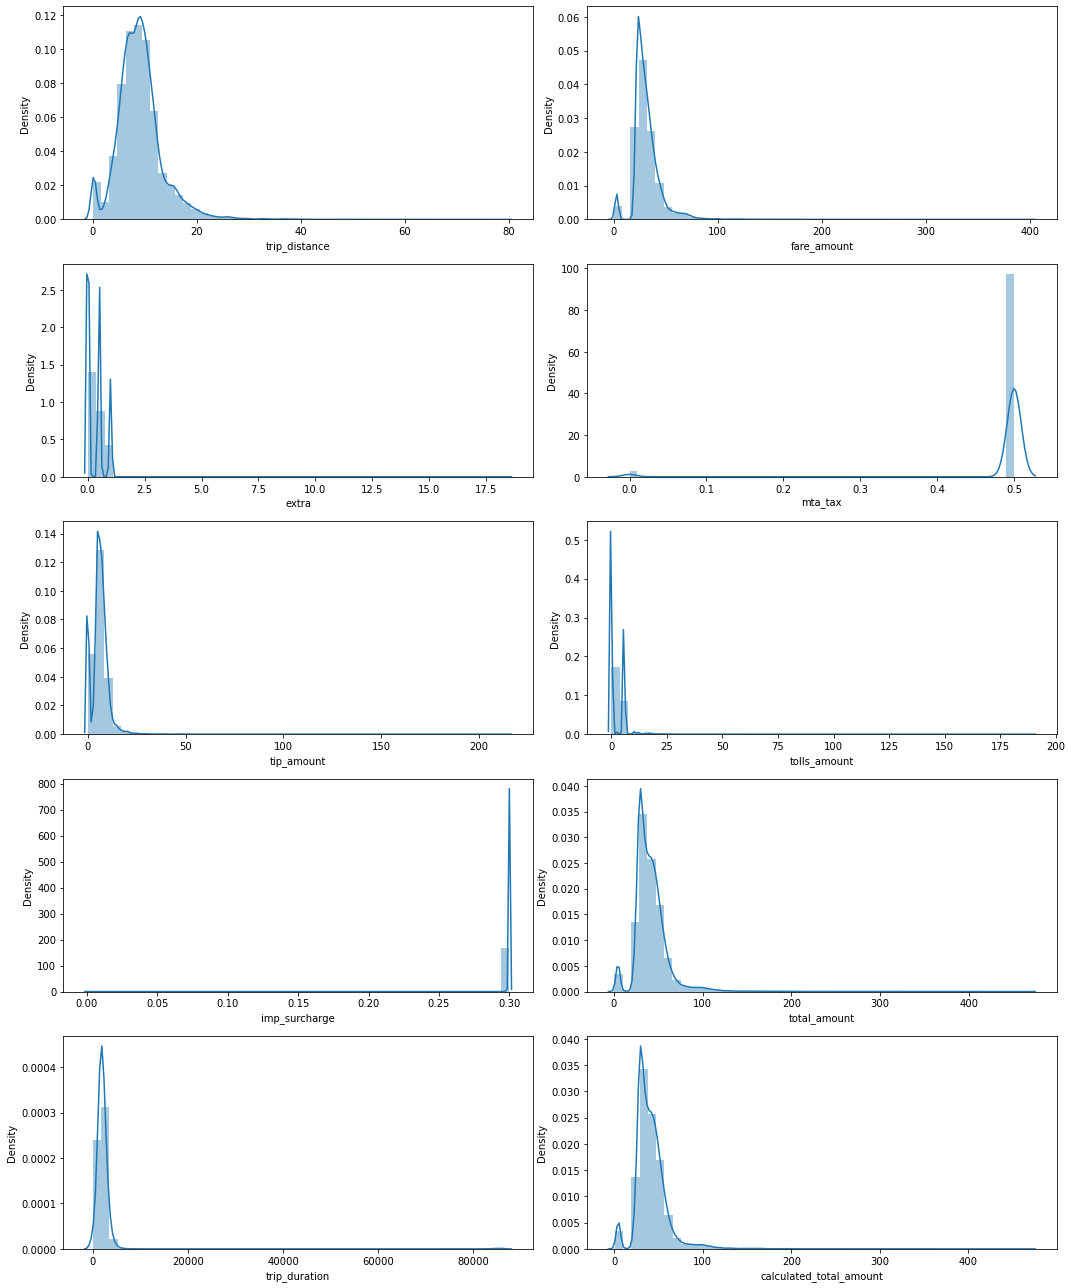

In [8]:
numeric_cols=['trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration','calculated_total_amount']
iterator=1
plt.figure(figsize=(15,18))
for i in numeric_cols:
    plt.subplot(5,2,iterator)
    sns.distplot(combined[i])
    iterator+=1
plt.tight_layout()
plt.show()

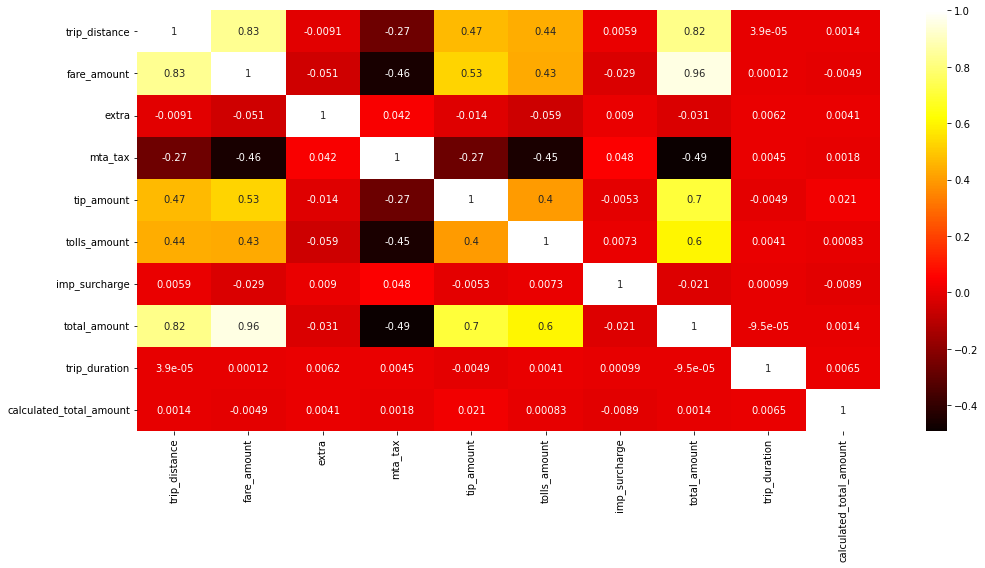

In [9]:
# check the correaltion b/w the columns
plt.figure(figsize=(15,8))
sns.heatmap(combined.loc[:,numeric_cols].corr(),annot=True,cmap="hot")
plt.tight_layout()
plt.show()

# Total Amount ~ 

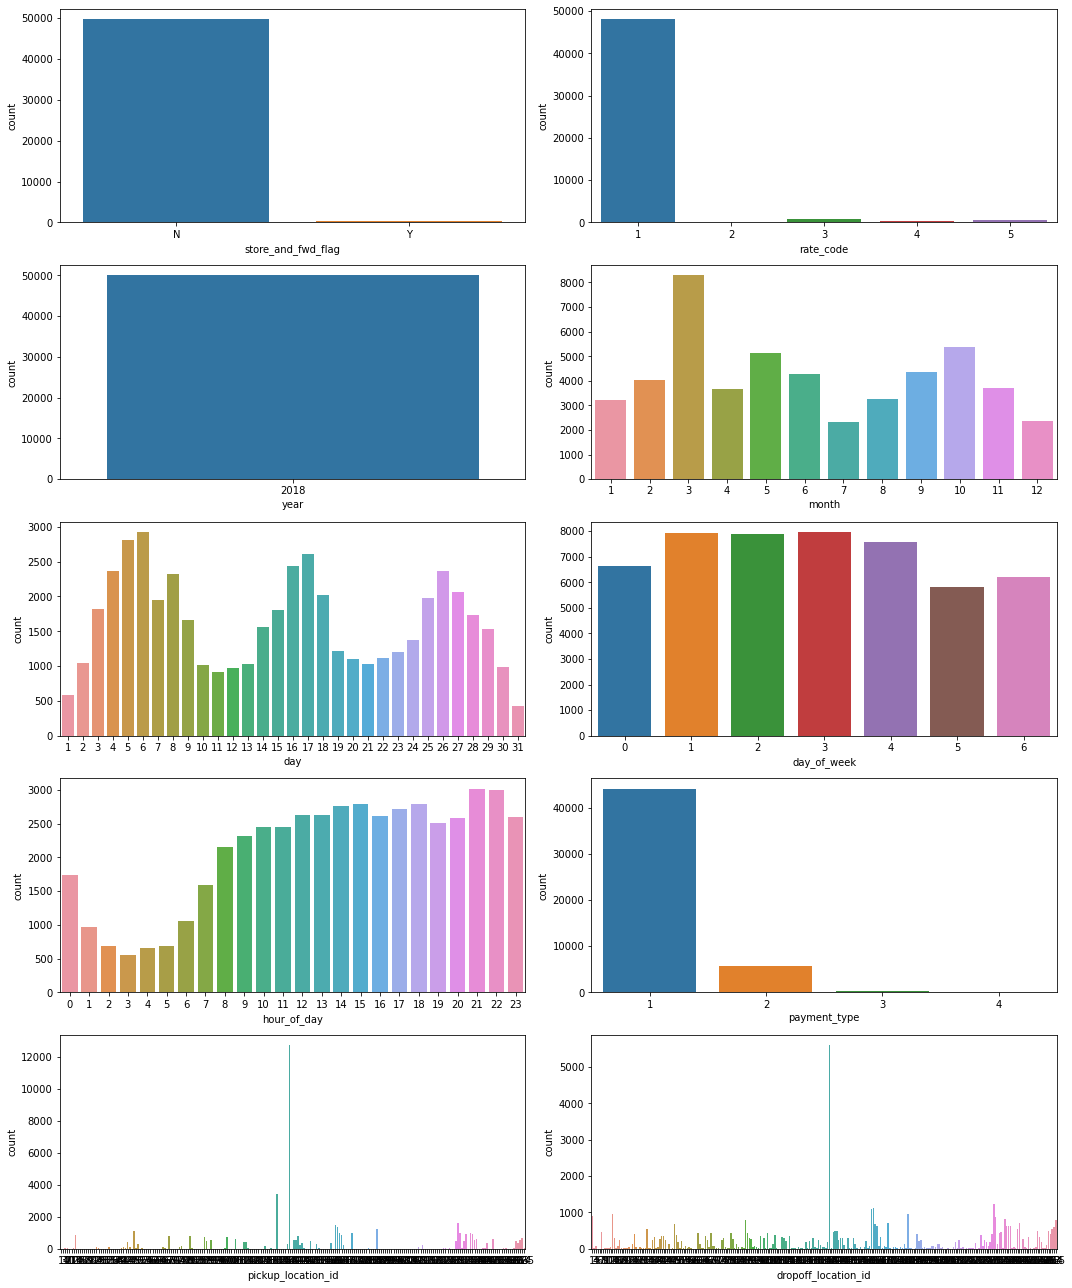

In [10]:
# Lets look into categorical variabale
cat_col.columns
cat_cols=['store_and_fwd_flag','rate_code','year', 'month', 'day', 'day_of_week','hour_of_day','payment_type',
          'pickup_location_id','dropoff_location_id']
iterator=1
plt.figure(figsize=(15,18))
for i in cat_cols:
    plt.subplot(5,2,iterator)
    sns.countplot(combined[i])
    iterator+=1
plt.tight_layout()
plt.show()



In [11]:
# submit the base model

submission["calculated_total_amount"] =train.calculated_total_amount.mean()

In [12]:
submission.to_csv("Basemodel_taxiFare.csv", index = False) # 19.18025

In [13]:
# Bivariate num vs num

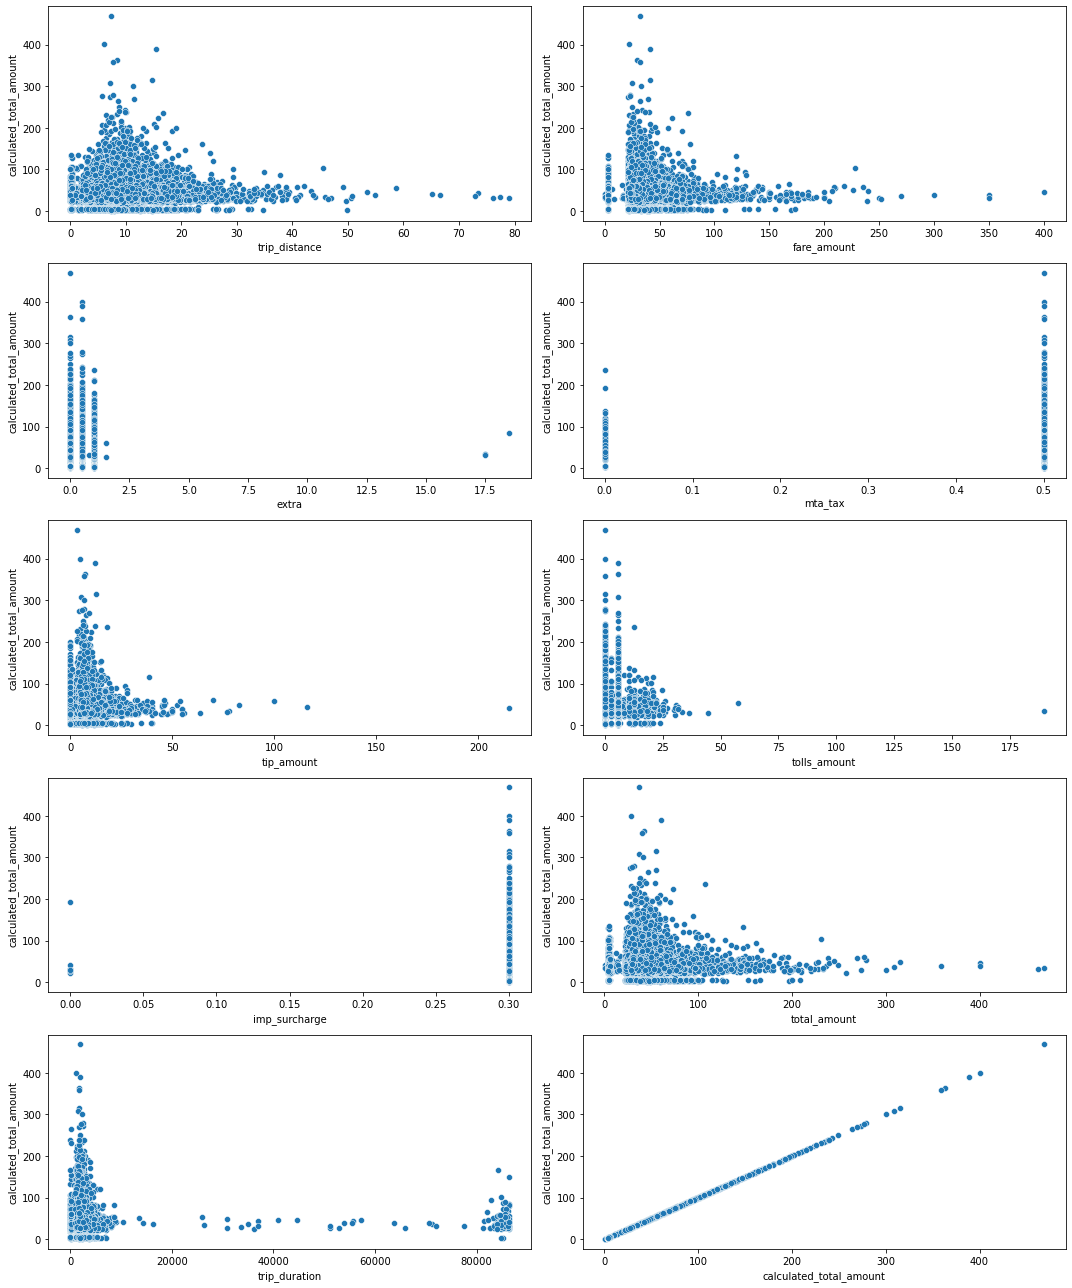

In [14]:
numeric_cols=['trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration','calculated_total_amount']
iterator=1
plt.figure(figsize=(15,18))
for i in numeric_cols:
    plt.subplot(5,2,iterator)
    sns.scatterplot(combined[i],combined.calculated_total_amount)
    iterator+=1
plt.tight_layout()
plt.show()



NOTE: We will have to remove the outliers in the data

In [15]:
#num vs cat

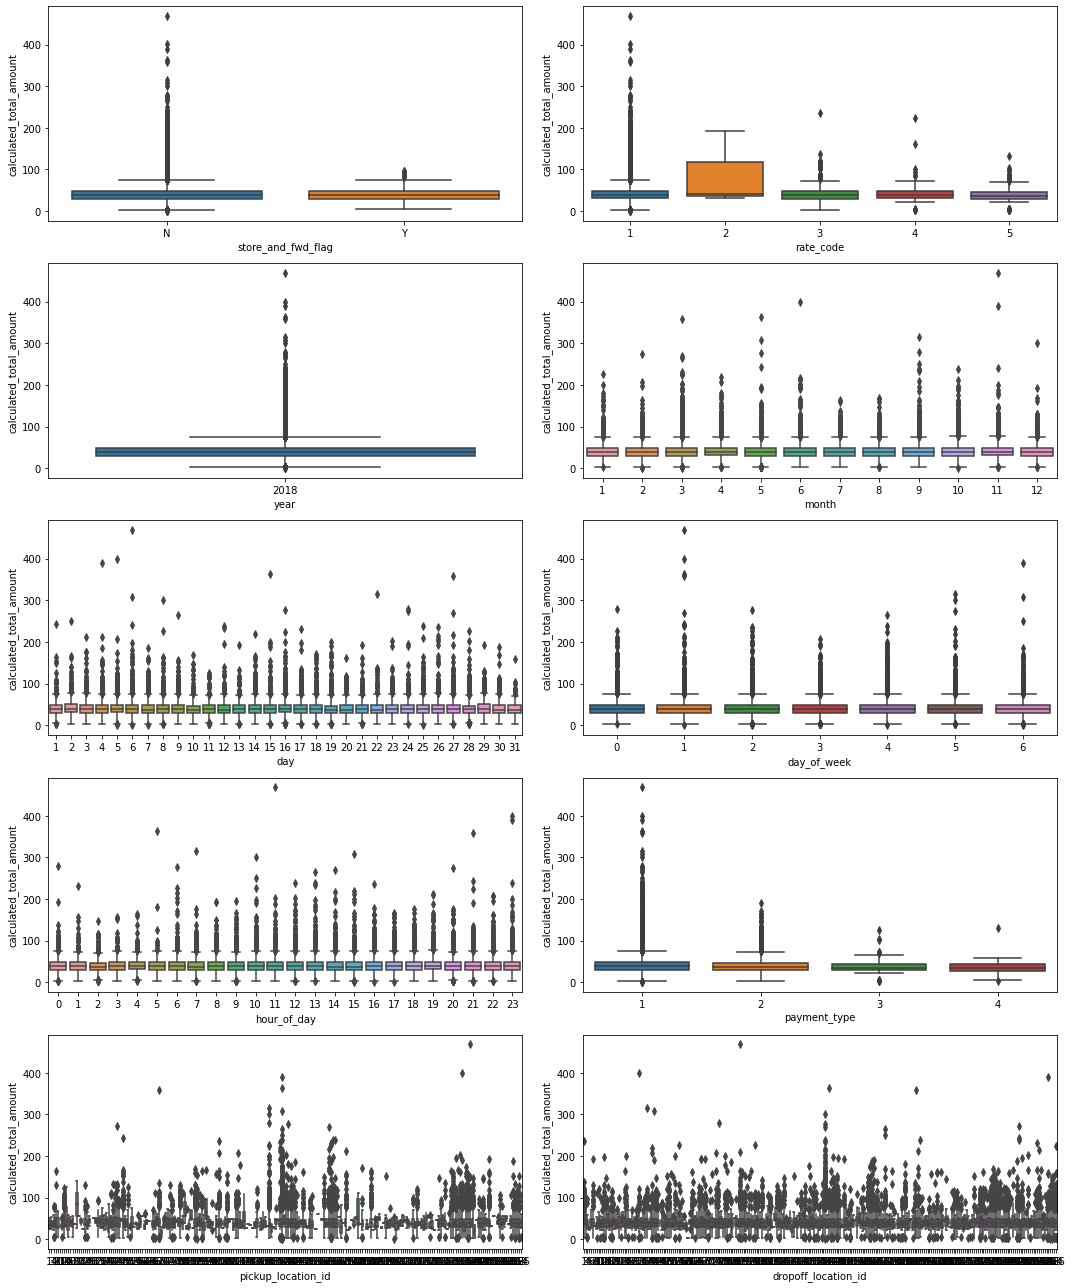

In [16]:
# Lets look into categorical variabale
cat_col.columns
cat_cols=['store_and_fwd_flag','rate_code','year', 'month', 'day', 'day_of_week','hour_of_day','payment_type',
          'pickup_location_id','dropoff_location_id']
iterator=1
plt.figure(figsize=(15,18))
for i in cat_cols:
    plt.subplot(5,2,iterator)
    sns.boxplot(combined[i],combined.calculated_total_amount)
    iterator+=1
plt.tight_layout()
plt.show()



In [17]:
# check for the missing values 

combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

# Feature Engineering

In [18]:
# Day of the week

<AxesSubplot:xlabel='day_of_week', ylabel='calculated_total_amount'>

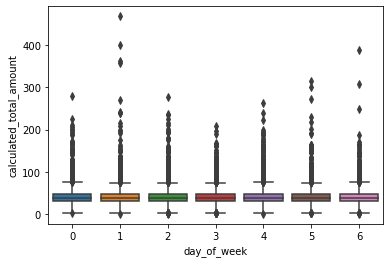

In [19]:
sns.boxplot(combined.day_of_week,combined.calculated_total_amount)

<AxesSubplot:xlabel='hour_of_day', ylabel='calculated_total_amount'>

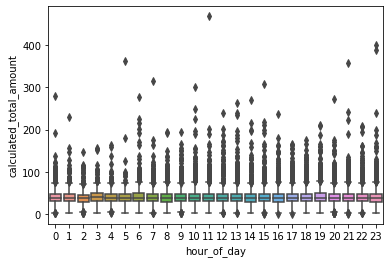

In [20]:
sns.boxplot(combined.hour_of_day,combined.calculated_total_amount)

<AxesSubplot:xlabel='hour_of_day', ylabel='calculated_total_amount'>

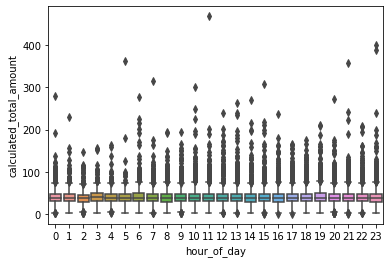

In [21]:
sns.boxplot(combined.hour_of_day,combined.calculated_total_amount)

In [22]:
# Busy housrs... Peak hours ...5,10,11,16,19,20,21,22,23

combined["peak_hours"]=combined.hour_of_day.apply(lambda x:1 if x in[5,10,11,16,19,20,21,22,23]else 0)

<AxesSubplot:xlabel='peak_hours', ylabel='calculated_total_amount'>

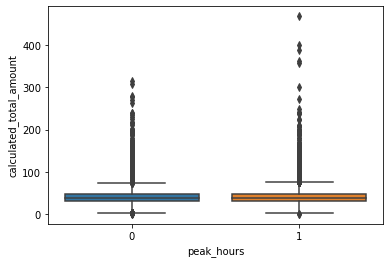

In [23]:
# lets check this if this variable has any pattern

sns.boxplot(combined.peak_hours,combined.calculated_total_amount)

<AxesSubplot:xlabel='calculated_total_amount'>

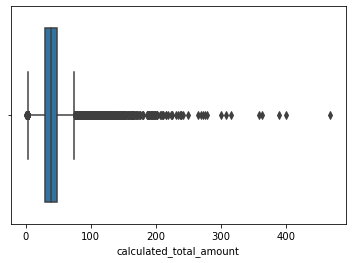

In [24]:
# Remove the Outliers from the Data
sns.boxplot(combined.calculated_total_amount)

In [25]:
# REMOVE THE OUTLIERS

In [26]:
q1= combined.quantile(0.25)
q3= combined.quantile(0.75)

iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3-1.5*iqr

In [27]:
# combined.loc[~((combined<lower_lim)|(combined>upper_lim)).any(axis=1)]

# Clustering

In [28]:
from yellowbrick.cluster import kelbow_visualizer,KElbowVisualizer
from sklearn.cluster import KMeans

kmeans= KMeans(random_state=2)
elbow=KElbowVisualizer(estimator=kmeans,random_state=42)

In [29]:
# hour of the day,day of the week ,month, day

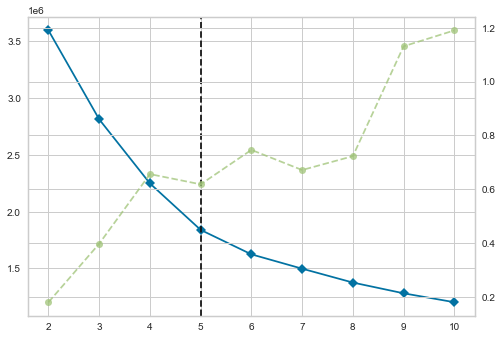

In [30]:
data = combined.loc[:,["month","day","day_of_week","hour_of_day"]]

# fit the elbow
elbow.fit(data)
plt.show() # gives me the number of cluster to be 5

In [31]:
kmeans= KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit(data)

combined["cluster_labels"]=labels.labels_

In [32]:
data = combined.loc[:,["pickup_location_id","dropoff_location_id"]]

# fit the elbow
elbow.fit(data)
plt.show()

In [33]:
kmeans= KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit(data)

combined["geo_labels"]=labels.labels_

In [34]:
# lat and longitude

In [35]:
# import the file

geolocs=pd.read_csv(r"C:\Users\agarw\Downloads\taxi_zone_lookup.csv")

In [36]:
manhattan_list=(geolocs.loc[geolocs.Borough=="Manhattan","LocationID"].to_list())
queens_list=(geolocs.loc[geolocs.Borough=="Queens","LocationID"].to_list())

In [37]:
def locs(x):
    if x in manhattan_list:
        return("Manhattan")
    elif x in queens_list:
        return("Queens")
    else:
        return("Others")

In [38]:
combined["location"]=combined.pickup_location_id.apply(locs)

In [39]:
#combined.drop(["pickup_location_id","dropoff_location_id","year","month","day","day_of_week","hour_of_day","Experiment"],axis=1,
#             inplace=True)

In [40]:
# cluster centroid

In [41]:
kmeans= KMeans(random_state=2)
elbow=KElbowVisualizer(estimator=kmeans,random_state=42)

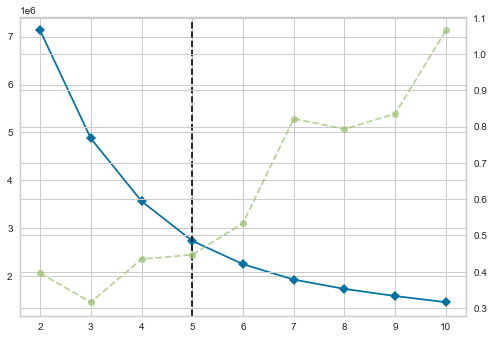

In [42]:
data = combined.loc[:,['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge']]

# fit the elbow
elbow.fit(data)
plt.show() 

In [43]:
kmeans= KMeans(n_clusters=6,random_state=42)
centres=kmeans.fit(data)

combined["fare_centres"]=centres.labels_

In [44]:
combined["trip_count"]=combined.groupby(by="pickup_location_id")["dropoff_location_id"].transform("nunique")

In [45]:
combined['fare_per_mile']=combined['total_amount']/combined['trip_distance']

In [46]:
combined["med_fare_pd"]=combined.groupby(by="day")["total_amount"].transform("median")

In [47]:
combined["mean_fare_pd"]=combined.groupby(by="day")["total_amount"].transform("mean")# not good

In [48]:
combined["std_fare_pd"]=combined.groupby(by="day")["total_amount"].transform("std")

In [49]:
combined["min_fare_pd"]=combined.groupby(by="day")["total_amount"].transform("min")

In [50]:
combined["max_fare_pd"]=combined.groupby(by="day")["total_amount"].transform("max")

In [51]:
#  fare per month

In [52]:
combined["med_fare_pm"]=combined.groupby(by="month")["total_amount"].transform("median")

In [53]:
combined["mean_fare_pm"]=combined.groupby(by="month")["total_amount"].transform("mean") # not good

In [54]:
combined["std_fare_pm"]=combined.groupby(by="month")["total_amount"].transform("std")

In [55]:
combined["min_fare_pm"]=combined.groupby(by="month")["total_amount"].transform("min")

In [56]:
combined["max_fare_pm"]=combined.groupby(by="month")["total_amount"].transform("max")

In [57]:
# drop the columns

newdata = combined.drop(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','imp_surcharge','pickup_location_id',
               'dropoff_location_id', 'year', 'month', 'day', 'day_of_week','hour_of_day'],axis=1)

In [58]:
# factorize the store and fwd flag
newdata.store_and_fwd_flag=pd.factorize(newdata.store_and_fwd_flag)[0]

In [59]:
# split the data in train and test

newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]

In [60]:
 #drop the target variable from  test
newtest.drop("calculated_total_amount",axis=1,inplace=True)

In [61]:
# removing the outliers from newtrain created
q1= newtrain.quantile(0.25)
q3= newtrain.quantile(0.75)

iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

In [62]:
 wt_outliers=newtrain.loc[~((newtrain<lower_lim)|(newtrain>upper_lim)).any(axis=1)]

In [63]:
# split the data in X and y

In [64]:
X=wt_outliers.drop("calculated_total_amount",axis=1)
y=wt_outliers.calculated_total_amount

In [65]:
X=pd.get_dummies(X,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)

In [66]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [67]:
def base_models():
    models=dict()
    models["lg"]=LinearRegression()
    models["tree"]=DecisionTreeRegressor()
    models["rf"]=RandomForestRegressor()
    models["gbm"]=GradientBoostingRegressor()
    models["xgb"]=XGBRegressor()
    models["lgbm"]=LGBMRegressor()
    return models

In [68]:
from sklearn.model_selection import cross_val_score,KFold

In [69]:
def eval_models(model):
    cv=KFold(n_splits=5,shuffle=True,random_state=42)
    score= -cross_val_score(estimator=model,X=X,y=y,cv=cv,scoring="neg_root_mean_squared_error",error_score="raise",n_jobs=-1)
    return score

In [70]:
result,names=list(),list()
models=base_models()
for name, model in models.items():
    finalscore=eval_models(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f(%.3f)'%(name,np.mean(result),np.std(result)))

lg 12.367(0.090)
tree 15.216(2.855)
rf 14.352(2.633)
gbm 13.865(2.431)
xgb 13.697(2.200)
lgbm 13.503(2.055)


In [71]:
# Lets start with LinearRegression
lr = LinearRegression()
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lr = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain, ytrain).predict(newtest))

In [72]:
pred = pd.DataFrame(pred_lr).T.mean(axis = 1) # 21.41

In [73]:
submission["calculated_total_amount"] = pred

In [74]:
submission.to_csv("LR_taxi_trip.CSV", index = False)

In [75]:
# Lets start with LGBM
lr = LGBMRegressor()
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lr = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain, ytrain).predict(newtest))
    

pred = pd.DataFrame(pred_lr).T.mean(axis = 1) # 19.33

In [76]:
submission["calculated_total_amount"] = pred
submission.to_csv("LGBM_taxi_trip.CSV", index = False)

In [77]:
cd

C:\Users\agarw
